In [180]:
def f(x):
    return 10*x**4 + 3*x**3 - 30*x**2 + 10*x

In [181]:
import matplotlib.pyplot as plt
def plot_f(input):                                         # f function plot
    plt.title("f(x)")
    plt.xlabel("x")
    plt.ylabel("y")
    y = [f(x) for x in input]
    plt.plot(input, y)
    plt.show()

In [182]:
def gradient_f(x):                                          # f function gradient
    return (40*x**3 + 9*x**2 - 60*x + 10)

In [183]:
from random import uniform

def get_min_f(beta):                                        # search for the min value of f function
    k = 0
    steps = 500
    x = uniform(-3, 3)
    previous_step = 1                                       # needed for while loop

    while k < steps and previous_step > 0.0001:            # less than 500 steps and steps bigger than 0.00001
        previous_min_x = x
        gradient = gradient_f(x)
        step = beta * gradient                              # small step in right direction
        x = x - step
        previous_step = abs(x - previous_min_x)
        k += 1

    return x                                                # min value should be here

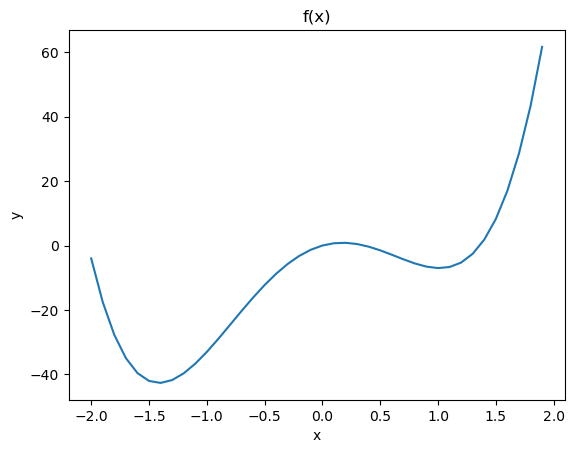

x: 1.0136423094879827
y: -7.0062743941410766
-------------------
x: -1.4128472204393576
y: -42.62766128781262
-------------------


In [184]:
import numpy as np

input = np.arange(-2.0, 2.0, 0.1)
plot_f(input)

beta = 0.001
for i in range(2):                                          # quick tests for f function
    result = get_min_f(beta)
    print("x: " + str(result))
    print("y: " + str(f(result)))
    print("-------------------")

In [185]:
def g(x1, x2):                                                                  # g function
    return 10*(x2**4)+10*(x1**4)+3*(x1**3)-30*(x1**2)+10*x1

In [186]:
from mpl_toolkits.mplot3d import Axes3D
def plot_g(a, b):                                                           # g function's plot
    X1, X2 = np.meshgrid(a, b)
    y = g(X1, X2)

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(X2, X1, y)
    plt.title("g(x1, x2)")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

In [187]:
def gradient_g(x1, x2):                                                       # g function gradient
    return (40*x1**3 + 9*x1**2 - 60*x1 + 10, 40*x2**3)

In [188]:
def get_min_g(beta):                                                        # search for the min value in g function
    k = 0
    steps = 500
    x1, x2 = uniform(-2, 2), uniform(-2, 2)
    previous_step1, previous_step2 = 1, 1                                           # needed for the loop
    precision = 0.0001

    while k < steps and (previous_step1 > precision or previous_step2 > precision):      # less than 500 steps and steps bigger than 0.00001
        previous_min1 = x1
        previous_min2 = x2
        gradient = gradient_g(x1, x2)                                               # finds direction
        step1, step2 = beta * gradient[0], beta * gradient[1]
        x1 = x1 - step1                                                             # small steps in right direction
        x2 = x2 - step2
        previous_step1 = abs(x1 - previous_min1)                                    # to control changes in while loop
        previous_step2 = abs(x2 - previous_min2)
        k += 1
        
    return (x1, x2)                                                                 # min value should be in these x's

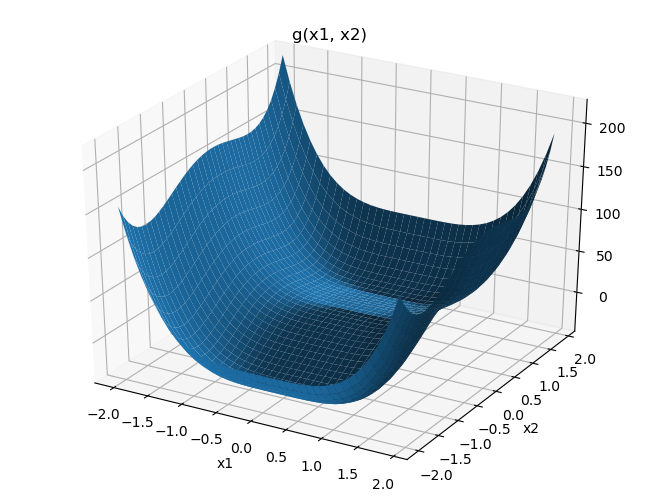

x1: -1.4123706144776542
x2: -0.1567167960977663
y: -42.621646767244506
-------------------
x1: 1.0125586528323942
x2: -0.1568939797234443
y: -7.000262824106262
-------------------


In [189]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = np.arange(-2.0, 2.0, 0.1)
plot_g(x1, x2)

beta = 0.001

for i in range(2):                                                  # quick test for function g
    result = get_min_g(beta)
    print("x1: " + str(result[0]))
    print("x2: " + str(result[1]))
    print("y: " + str(g(result[0], result[1])))
    print("-------------------")

In [190]:
def get_beta():                                                     # creates list of beta values: [0.001, 0.002, 0.003, ... ]
    beta = [i/1000 for i in range(1, 25)]
    return beta


In [191]:
def get_data_f(n=500):                                              # creates data for later use in plotters
    beta = get_beta()                                               # prepares lsit of beta values

    data = []

    for b in beta:                                                  # for each beta it creates 500 random points and finds the min value of the function, then stores results in a list
        result = []                                                 # if there is an error (mainly stack overflow) it appends None as a value
        for x in range(n):                                          # Function returns list of tuples (beta value + found mins of the function using this particular beta)
            try:
                result.append(f(get_min_f(b)))
            except:
                result.append(None)
            
        data.append((b, result))

    return data

In [192]:
def get_data_g(n=500):                                             # works the same as for f function
    beta = get_beta()

    data = []

    for b in beta:
        result = []
        for x in range(n):
            try:
                x = get_min_g(b)
                
            except:
                result.append(None)
            try:
                result.append(g(x[0], x[1]))
            except:
                result.append(None)

        data.append((b, result))

    return data

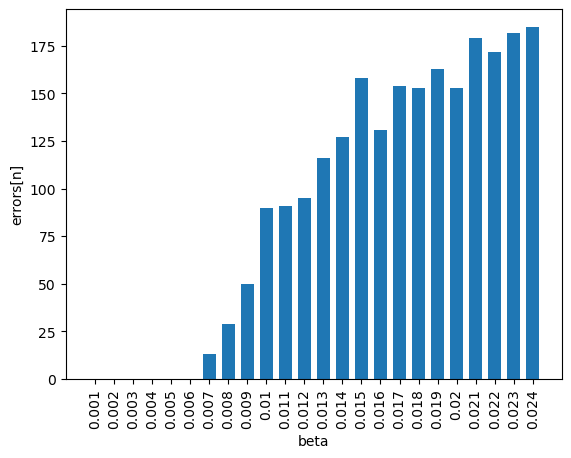

In [193]:
def error_plot(option="f"):                                                     # Jest to funkcja ktora tworzy wykres ile razy wystapil error w zaleznosci od konkretnych wartosci beta
    if option == "f":                                                           # przygotowuje dane odpowiedniej funkcji zgodnie z opisem powyzej i przechowuje je w zmiennej data
        data = get_data_f()
    else:                                                                       # nastepnie petla for przechodzi po danych i tworzy dwie listy przeznaczone do wykresu: beta i ilosc bledow dla danej bety
        data = get_data_g()                                                     # tworzy druga liste beta aby na pewno stworzyc listy do wykresu o tej samej dlugosci
    
    beta = []
    error_plot_data = []

    for b, values in data:
        none_counter = 0
        for y in values:
            beta.append(str(b))
            if y is None:
                 none_counter += 1
            error_plot_data.append(none_counter)

    plt.bar(beta, error_plot_data, width=0.7)
    plt.xticks(rotation=90)
    plt.xlabel('beta')
    plt.ylabel('errors[n]')
    plt.show()


error_plot("f")                 # gdy gradient byl za duzy, funkcja byla zbyt stroma


In [194]:
# wykres przedsatwia liczbe bledow przy oblicznaiu min_value dla konkretnych warosci beta
# Z wykresu wynika ze dla dostatecznie malych wartosci beta: [0.001, 0.006] nie otrzymujemy zadnych bledow. Zaczynaja sie pojawiac od wartosci 0.007. Na poczatku jest ich niewiele ale gwaltownie rosna.
# powyzej wartosci 0.015 trzymaja sie na podobnym poziomie.
# Wniosek: Warto uzywać niewielkich wartosci beta

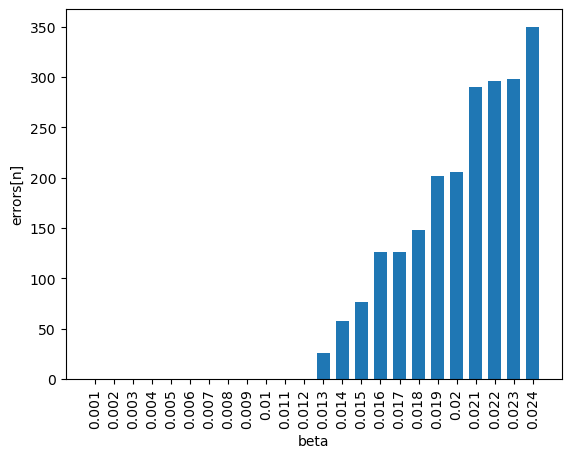

In [195]:
error_plot("g")

In [196]:
# W przypadku funkcji G obserwacje sa bardzo zbliznone. Roznice sa takie ze bledy zaczynaja pojawiac sie pozniej, tzn przy wiekszych wartosciach beta (od 0.013)
# a takze ilosc bledow jest wieksza. Przy wartosci beta - 0.024 jest ich ponad 300
# Wniosek: Warto uzywac nieduzych wartosci beta

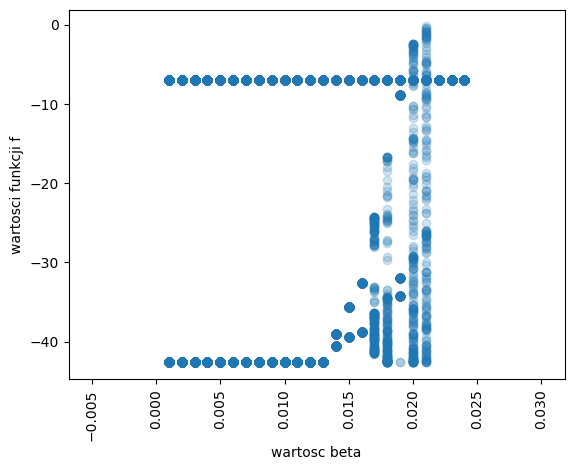

In [197]:

def test(option="f", num=500):                              # funkcja test tworzy wykres wynikow algorytmu znajdujacego min value funkcji w zaleznosci od roznych wartosci beta
    if option == "f":                                       # przygotowuje dane odpowiedniej funkcji zgodnie z opisem powyzej (przy funkcji get_data_*) i przechowuje je w zmiennej data
        data = get_data_f(num)                              # dla kazdej krotki dodajemy wartosci do list beta_plot oraz values_plot odpowiednio dla wartosci beta i wyniku algorytmu szukajacego min_value
    else:                                                   # nastepnie z tych list tworzymy wykres
        data = get_data_g(num)
    
    beta_plot = []
    values_plot = []

    for beta, values in data:
        for value in values:
            if value and value < 0:
                beta_plot.append(beta)
                values_plot.append(value)

    plt.scatter(beta_plot, values_plot, alpha=0.2)
    plt.xticks(rotation=90)
    plt.xlabel('wartosc beta')
    plt.ylabel('wartosci funkcji f')
    plt.show()

test("f")

In [198]:
# wykres przedstawia wyniki algorytmu szukajacego min_value dla konkretnych wartosci beta. Mozemy z niego zaobserwowac skupenie dla dwoch wartosci funkcji: -7 i -42
# jedno z nich to minimum lokalne a drugie globalne(-42) Algorytm osiaga tylko te wartosci dla mniejszych beta. Wraz ze wzrostem beta wartosci sa bardziej rozrzucone.
# rozstrzelane wyniki zaczynamy otrzymywac mniej wiecej od wartosci beta - 0.014
# Wnioski: Wraz ze wzrostem wartosci beta tracimy precyzje i wiarygodnosc rozwiazan. Nalezy uzywac stosunkowo niewielkich wartosci beta

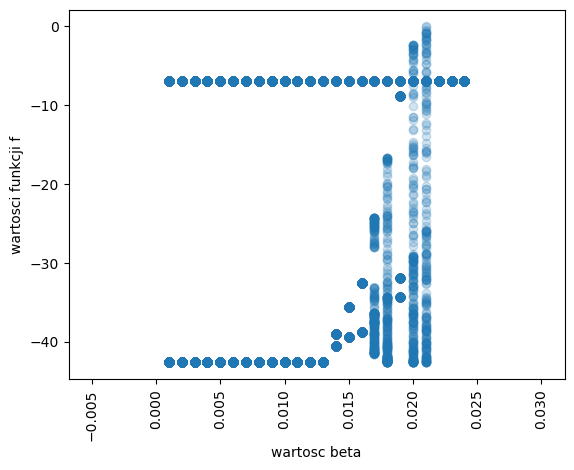

In [199]:
test("g", 500)

In [200]:
# obserwacje i wnioski bardzo zblizone do przedstawionych wyzej